In [1]:
%matplotlib inline
import h5py
import numpy as np
import os
from UG2.utils import data as data_utils
from UG2.utils import image as image_utils
from UG2.config import Config
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import scipy.ndimage as im
import time
from UG2 import main

In [2]:
destination_path     = "/data/UG2_data/h5Files/"
data_source_path     = "/data/UG2_data/imagenet_cropped_dataset/"

In [3]:
## create blurred-dataset 
patch_size          = np.array([128,128])
source_name_files   = []
kernel_blurring_flag= True
num_files           = 62
testing_fraction    = 0.75
scale_factor        = 1
flags               = [0, 1]
gaussian_blur_range = [0.1, 2.5]
nTK                 = 1
image_format        = ".h5" 

In [4]:
source_name_files   = []
if image_format == ".png":
    for i in range(1,num_files+1):
        source_name_files.append("img_"+"%03d"%i+"_SRF_2_HR")
else:
    for i in range(num_files):
        source_name_files.append("imagenet_bin_224_"+str(i))
        
blur_parameters = {}

blur_parameters["nTK"]                  = nTK
blur_parameters["scale_factor"]         = scale_factor
blur_parameters["flags"]                = flags
blur_parameters["gaussian_blur_range"]  = gaussian_blur_range

if image_format == ".png":
    dataset_name        = "imagenet"+"_nTK_"+str(nTK)+ "_flag_" + "_".join([str(f) for f in flags])+"factor"+str(scale_factor)+"nFiles"+str(num_files)
    data_utils.create_dataset(data_source_path, source_name_files, image_format, destination_path, dataset_name, num_files, patch_size, testing_fraction, blur_parameters)
    print("h5File created: "+destination_path+dataset_name+".h5")
else:
    for i in range(1,1+num_files):
        dataset_name        = "imagenet"+"_nTK_"+str(nTK)+ "_flag_" + "_".join([str(f) for f in flags])+"factor"+str(scale_factor)+"nFile"+str(i)
        data_utils.create_dataset(data_source_path, source_name_files[i], image_format, destination_path, dataset_name, num_files, patch_size, testing_fraction, blur_parameters)
        print("h5File created: "+destination_path+dataset_name+".h5")    

Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files/imagenet_nTK_1_flag_0_1factor1nFile1.h5
Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files/imagenet_nTK_1_flag_0_1factor1nFile2.h5
Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files/imagenet_nTK_1_flag_0_1factor1nFile3.h5
Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files/imagenet_nTK_1_flag_0_1factor1nFile4.h5
Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5Fi

data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files/imagenet_nTK_1_flag_0_1factor1nFile39.h5
Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files/imagenet_nTK_1_flag_0_1factor1nFile40.h5
Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files/imagenet_nTK_1_flag_0_1factor1nFile41.h5
Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files/imagenet_nTK_1_flag_0_1factor1nFile42.h5
Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
h5File created: /data/UG2_data/h5Files

IndexError: list index out of range

IndexError: index 6 is out of bounds for axis 0 with size 6

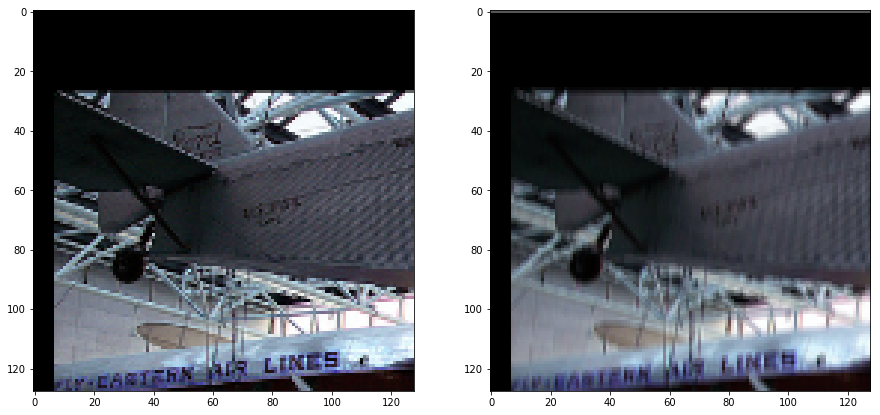

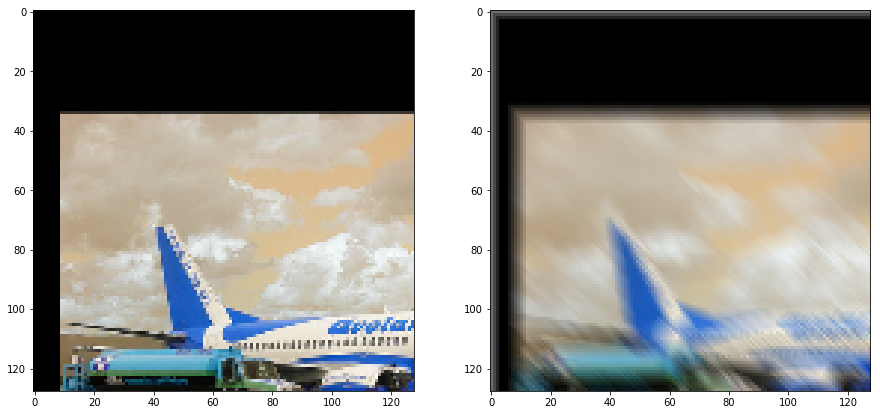

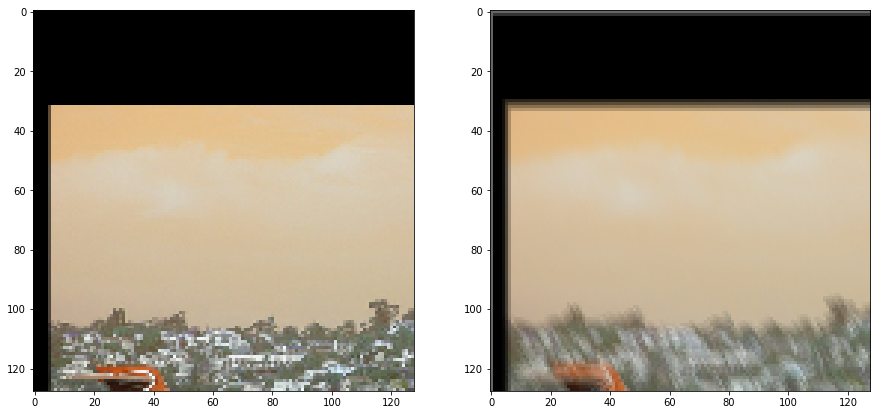

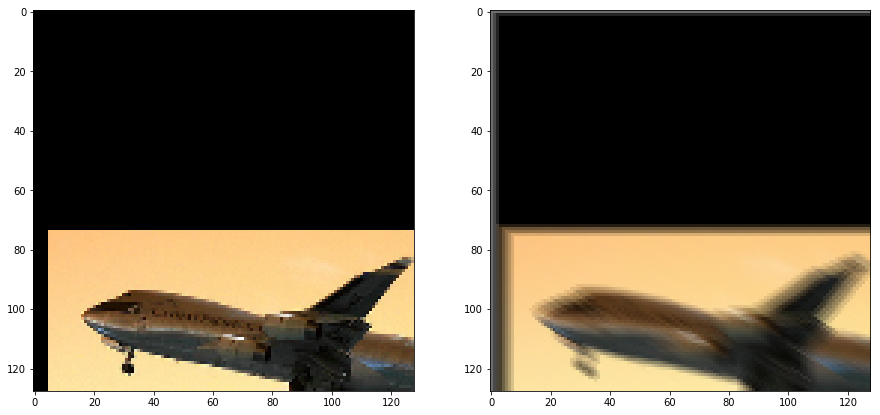

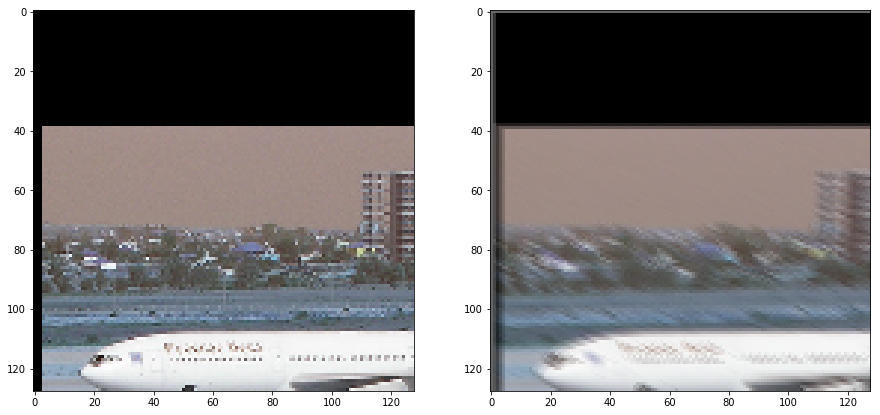

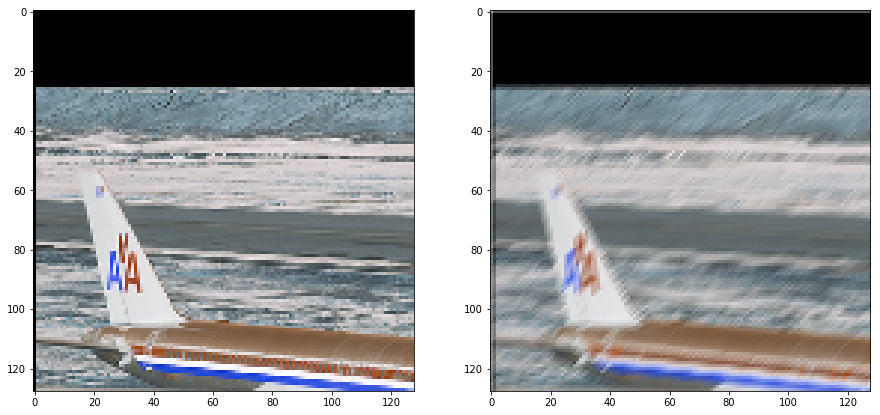

In [9]:
with h5py.File(os.path.join(destination_path, dataset_name+".h5"),'r') as file:
    data = np.array(file["data"])
    label= np.array(file["label"])
for imageIndex in range(10):
    testImage = data[imageIndex]
    testImage = np.transpose(testImage.astype(np.uint8), (1, 2, 0))
    GTImage = label[imageIndex]
    GTImage = np.transpose(GTImage.astype(np.uint8), (1, 2, 0))
    plt.figure(figsize=(15,15))
    plt.subplot(121)
    plt.imshow(GTImage)
    plt.subplot(122)
    plt.imshow(testImage)


In [6]:
data_utils.create_dataset(data_source_path, source_name_files[62], image_format, destination_path, dataset_name, num_files, patch_size, testing_fraction, blur_parameters)


Number of images in the dataset: 2000
data of shape  (1499, 3, 128, 128) and label of shape  (1499, 3, 128, 128)  created of type uint8
